In [2]:
import os
import pandas as pd
import numpy as np

import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read results

In [7]:

logs_dir = './logs/modeldata'
all_files = os.listdir(logs_dir)

csv_files = [file for file in all_files ]

print(csv_files)
csv_files=csv_files[1:3]
#csv_files=[csv_files[0],csv_files[-1]]
print(csv_files)


['_March21_10_50_01_.csv', '_April10_13_36_44_.csv', '_April06_13_56_06_.csv', '_April04_17_16_55_.csv', '_March29_18_58_37_.csv']
['_April10_13_36_44_.csv', '_April06_13_56_06_.csv']


# Box plot

In [8]:
dataframes = []
for file in csv_files:
    file_path = os.path.join(logs_dir, file)
    print(file_path)
    df = pd.read_csv(file_path)
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)
print(df)

./logs/modeldata/_April10_13_36_44_.csv
./logs/modeldata/_April06_13_56_06_.csv
     test accuracy    recall  precision  trainingset_size             type  \
0        75.496117  0.309057   0.747178               500  active learning   
1        81.075640  0.596639   0.738728              1000  active learning   
2        81.995974  0.630252   0.745856              1500  active learning   
3        83.779120  0.599440   0.826255              2000  active learning   
4        85.274662  0.607843   0.876178              2500  active learning   
..             ...       ...        ...               ...              ...   
495      84.872016  0.614379   0.853437              3000  active learning   
496      85.734829  0.643324   0.858032              3500  active learning   
497      86.626402  0.638655   0.897638              4000  active learning   
498      85.763589  0.661064   0.842857              4500  active learning   
499      86.453840  0.643324   0.885604              5000  act

# Influence model architecture

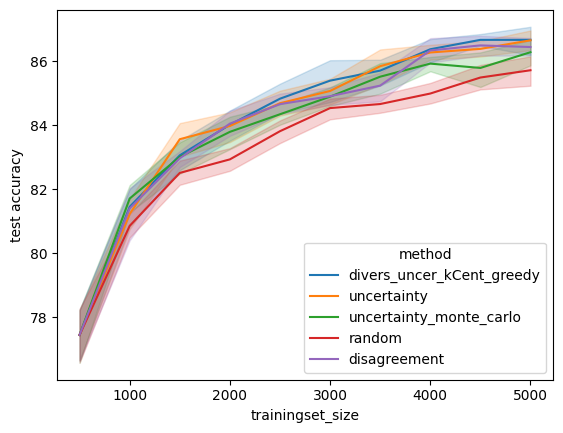

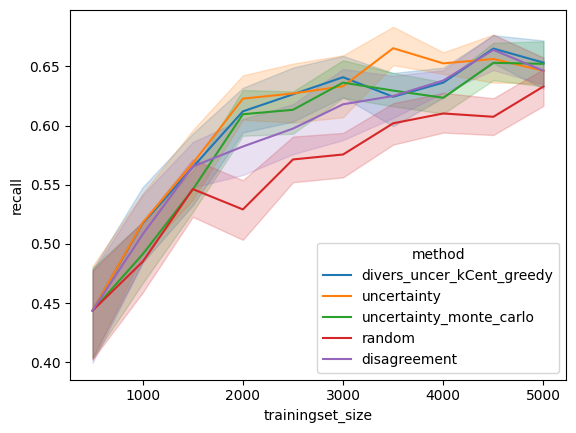

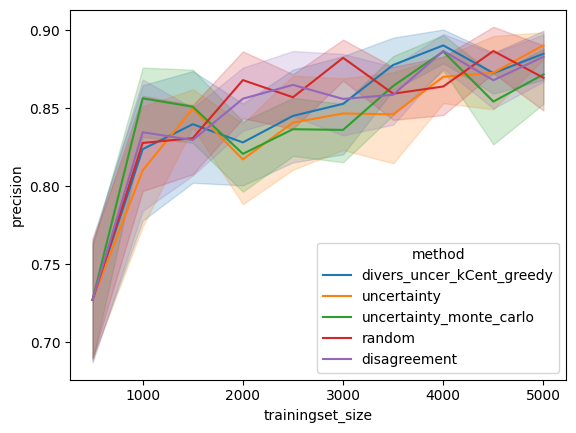

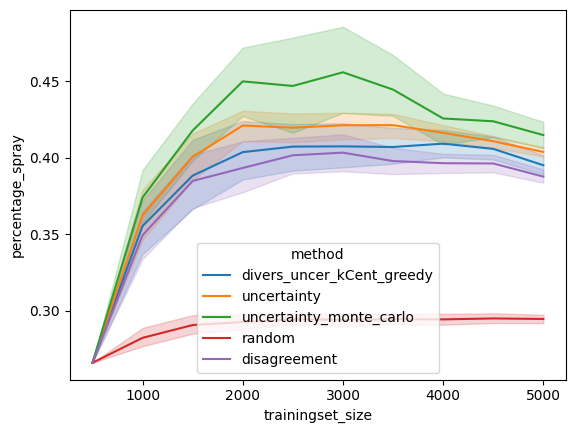

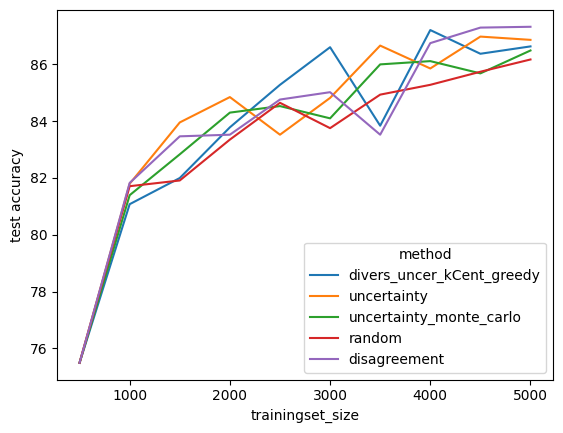

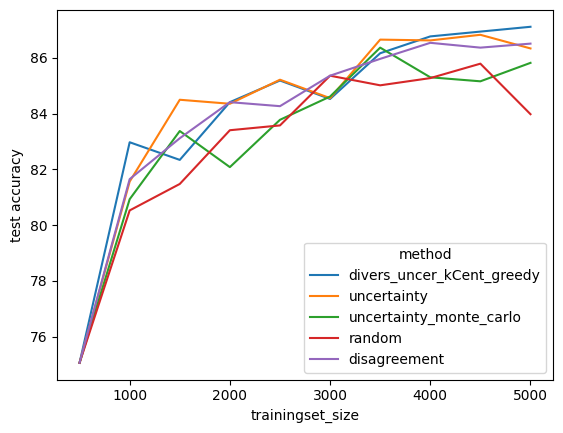

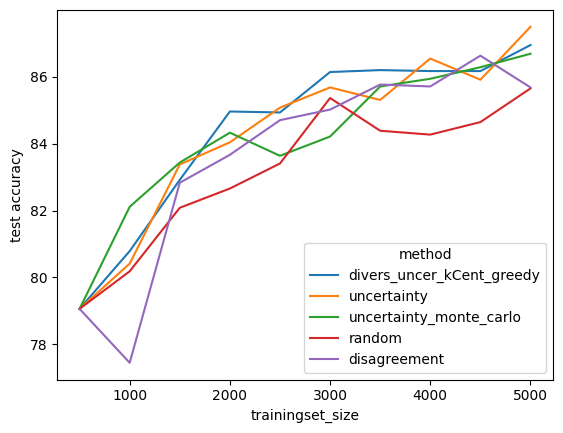

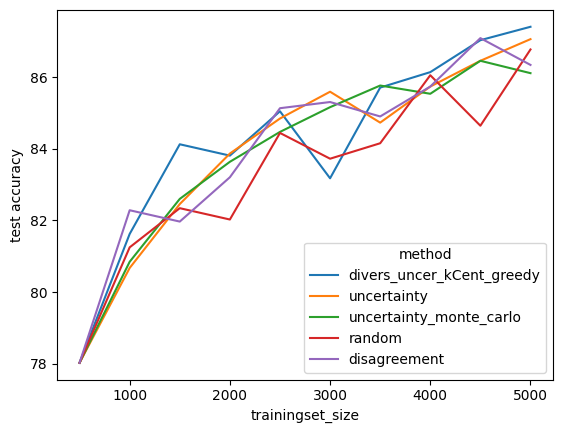

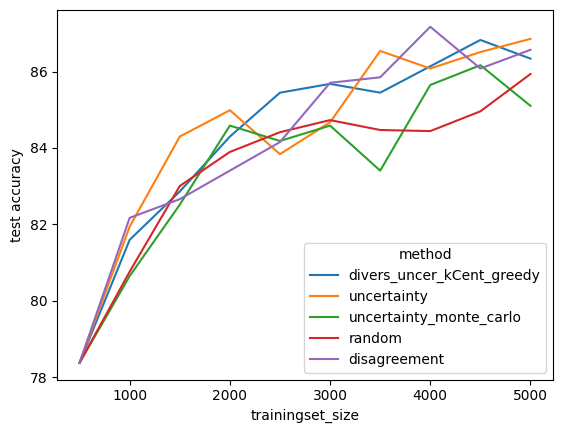

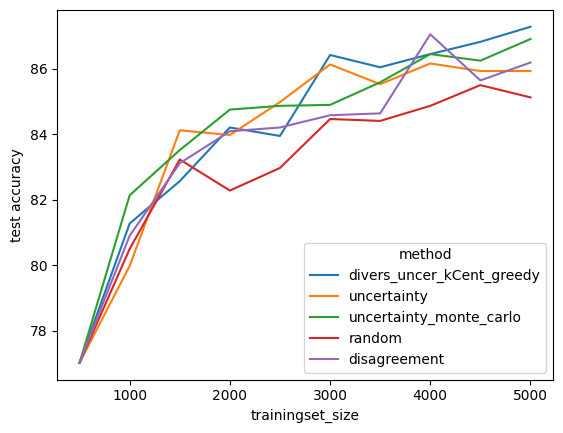

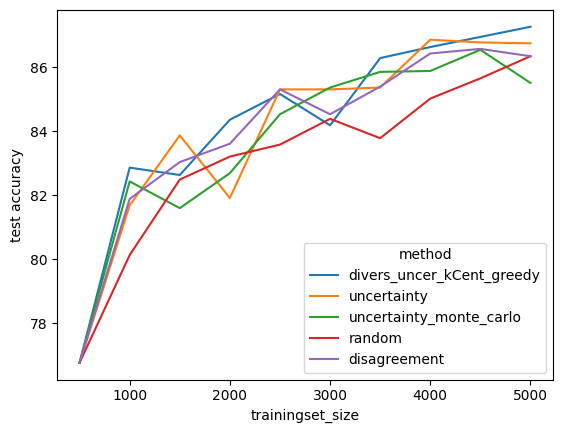

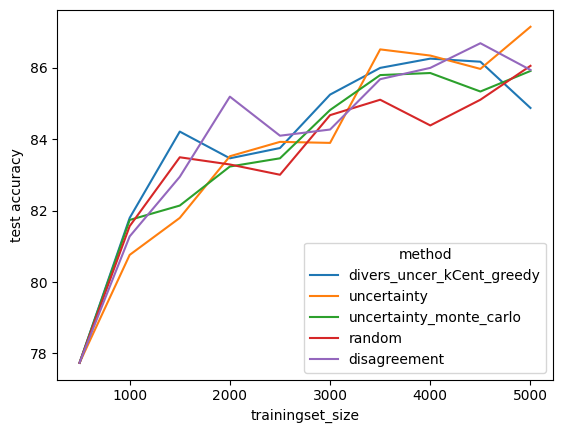

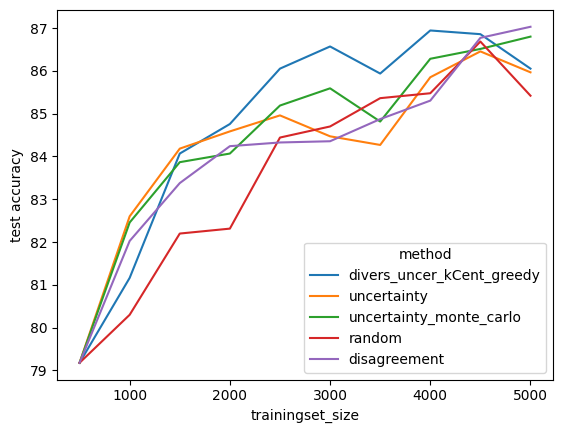

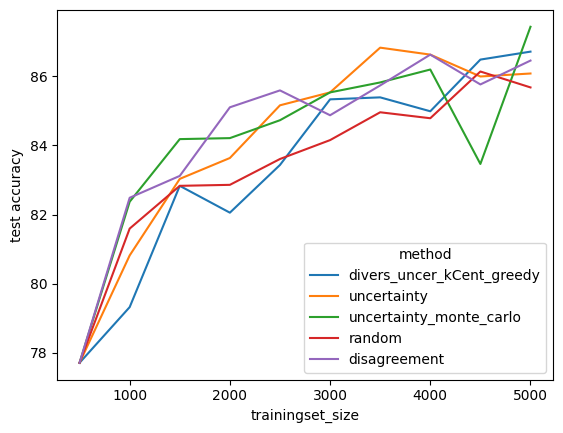

In [10]:
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']
#df = pd.concat([df[df['method'] == 'random'], df[df['type'] == 'active learning_no_weight']])
#df=df[df['method'] == 'random']
#df=df[df['type'] == 'active learning_no_weight']

sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="recall", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="precision", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="percentage_spray", hue="method")
plt.show()
for i in range(10):

    sns.lineplot(data=df[df['seed'] == i], x="trainingset_size", y="test accuracy", hue="method")
    plt.show()

#sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
#sns.lineplot(data=sns.lineplot(data=df[''], x="trainingset_size", y="test accuracy", hue="method")



# Influence preprocessing

## Masking vs pixel remapping

## Crop remap interpolation

Procedure:

* Crop rectangle in frame
* Remap pixels in trapezoid to square

Check influence of interpolation type during remap on the accuracy

# Influence input resolution